In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

In [2]:
db=pd.read_csv("../Dataset/parkinsons.csv")

In [3]:
db.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [4]:
db.isnull().sum()

name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

In [5]:
db=db.drop(columns='name',axis=1)

C:\Users\vivek kumar\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


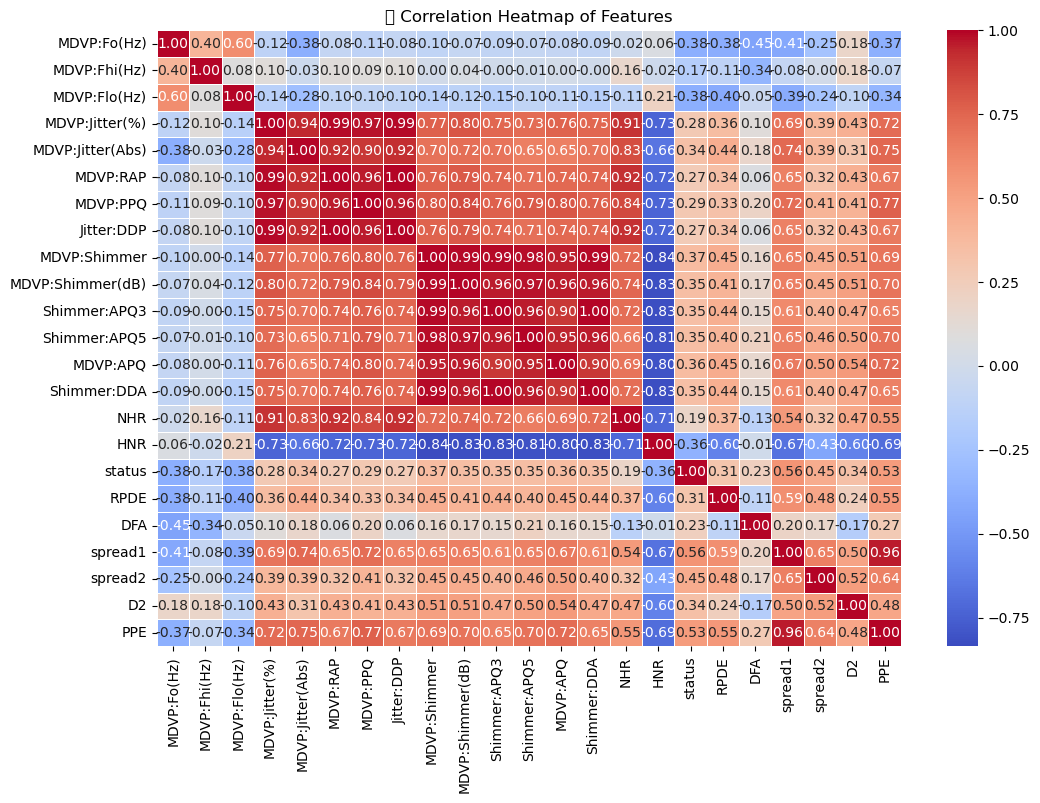

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your DataFrame is 'db'
plt.figure(figsize=(12, 8))
corr_matrix = db.corr()

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("🔍 Correlation Heatmap of Features")
plt.show()


In [7]:
db=db.drop(columns=['MDVP:Fo(Hz)','MDVP:Fhi(Hz)','MDVP:Flo(Hz)','NHR','HNR','RPDE','DFA','spread1','spread2','D2','PPE'],axis=1)

In [8]:
# X=db.drop(columns=["name","status"],axis=1)
# y=db["status"]
db.head()

,MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,status
0,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,0.02182,0.03130,0.02971,0.06545,1
1,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,0.03134,0.04518,0.04368,0.09403,1
2,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,0.02757,0.03858,0.03590,0.08270,1
3,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,0.02924,0.04005,0.03772,0.08771,1
4,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,0.03490,0.04825,0.04465,0.10470,1


In [9]:
X=db.drop(columns=["status"],axis=1)
y=db["status"]

In [10]:
X

,MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA
0,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,0.02182,0.03130,0.02971,0.06545
1,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,0.03134,0.04518,0.04368,0.09403
2,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,0.02757,0.03858,0.03590,0.08270
3,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,0.02924,0.04005,0.03772,0.08771
4,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,0.03490,0.04825,0.04465,0.10470
...,...,...,...,...,...,...,...,...,...,...,...
190,0.00459,0.00003,0.00263,0.00259,0.00790,0.04087,0.405,0.02336,0.02498,0.02745,0.07008
191,0.00564,0.00003,0.00331,0.00292,0.00994,0.02751,0.263,0.01604,0.01657,0.01879,0.04812
192,0.01360,0.00008,0.00624,0.00564,0.01873,0.02308,0.256,0.01268,0.01365,0.01667,0.03804
193,0.00740,0.00004,0.00370,0.00390,0.01109,0.02296,0.241,0.01265,0.01321,0.01588,0.03794


In [11]:
scaler=StandardScaler()
scaler_X=scaler.fit_transform(X)

In [12]:
scaler_X

array([[ 0.33491386,  0.74975946,  0.13296255, ...,  1.11914677,
         0.33298451,  0.60753214],
       [ 0.71541825,  1.03767418,  0.45389169, ...,  2.27650439,
         1.15945391,  1.54825419],
       [ 0.88499086,  1.3255889 ,  0.72076961, ...,  1.72617584,
         0.69918677,  1.17532274],
       ...,
       [ 1.52605805,  1.03767418,  0.99102574, ..., -0.35256519,
        -0.43846581, -0.29467889],
       [ 0.24392368, -0.1139847 ,  0.13296255, ..., -0.38925376,
        -0.48520245, -0.29797043],
       [-0.11383317, -0.40189942, -0.12040257, ..., -0.52266674,
        -0.61239709, -0.53364467]])

In [13]:
X_train, X_test, y_train, y_test= train_test_split(scaler_X,y, test_size=0.2,stratify=y,random_state=42 )

In [14]:
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Support Vector Machine": SVC(),
    "Naive Bayes": GaussianNB()
}

In [15]:
results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"📌 {name} Accuracy: {acc:.2f}")
    print(classification_report(y_test, y_pred))
    results.append((name, acc))

# 5. Display summary
print("\n📊 Accuracy Summary:")
pd.DataFrame(results, columns=['Model', 'Accuracy']).sort_values(by='Accuracy', ascending=False)

📌 Logistic Regression Accuracy: 0.79
              precision    recall  f1-score   support

           0       0.67      0.40      0.50        10
           1       0.82      0.93      0.87        29

    accuracy                           0.79        39
   macro avg       0.74      0.67      0.69        39
weighted avg       0.78      0.79      0.78        39

📌 Decision Tree Accuracy: 0.87
              precision    recall  f1-score   support

           0       0.69      0.90      0.78        10
           1       0.96      0.86      0.91        29

    accuracy                           0.87        39
   macro avg       0.83      0.88      0.85        39
weighted avg       0.89      0.87      0.88        39

📌 Random Forest Accuracy: 0.79
              precision    recall  f1-score   support

           0       0.60      0.60      0.60        10
           1       0.86      0.86      0.86        29

    accuracy                           0.79        39
   macro avg       0.73      

C:\Users\vivek kumar\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\vivek kumar\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\vivek kumar\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


,Model,Accuracy
1,Decision Tree,0.871795
3,K-Nearest Neighbors,0.820513
0,Logistic Regression,0.794872
2,Random Forest,0.794872
4,Support Vector Machine,0.743590
5,Naive Bayes,0.589744


In [16]:
import pickle

ds_model = DecisionTreeClassifier()
ds_model.fit(X_train, y_train)


with open('parkinson.pkl', 'wb') as f:
    pickle.dump(ds_model, f)


print("✅ Pickle files saved: 'parkinson.pkl' and 'parkinson_scaler.pkl'")

✅ Pickle files saved: 'parkinson.pkl' and 'parkinson_scaler.pkl'
